<img src="normal_Human_activity_recognition.jpg">

# Human Activity Recognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB

# Quick overview of the dataset :


* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.

## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [1]:
# Importing necessary libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import datetime as dt

# Machine Learning
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn import linear_model, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Deep Learning
import tensorflow as tf
import keras
from keras import backend as K
from keras import regularizers, optimizers
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical


Using TensorFlow backend.


In [2]:
# get the features from the file features.txt

with open('features.txt') as f:
    # dividing "i" into two parts and considering 2nd part. ['1 tBodyAcc-mean()-X'], here 1 is 1st part and rest is 2nd part.
    features= [i.split()[1] for i in f.readlines()]
    
print('Sample features:\n',features[:5])
print('\nTotal no of features: ', len(features))

Sample features:
 ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y']

Total no of features:  561


## Obtain the  train data 

In [3]:
# get the data from .txt files to pandas dataframe
# delim_whitespace : bool, default False => Specifies whether or not whitespace (e.g. '' or ' ') will be used as the sep. 
# Equivalent to setting sep='\s+'. If this option is set to True, nothing should be passed in for the delimiter parameter.

X_train= pd.read_csv('X_train.txt', delim_whitespace= True, header= None)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [4]:
X_train.columns = features

In [5]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [6]:
# add subject column to the dataframe

X_train['subject'] = pd.read_csv('subject_train.txt')

In [7]:
# squeeze : If the parsed data only contains one column then return a Series. (or else we cannot 'map' the below dict)

y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze= True)
y_train.head()

0    5
1    5
2    5
3    5
4    5
Name: Activity, dtype: int64

In [8]:
y_train.value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: Activity, dtype: int64

In [9]:
# Labelling the classes in y.
label = {1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'}

In [10]:
y_train_labels = y_train.map(label)
y_train_labels.head()

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: Activity, dtype: object

In [11]:
y_train_labels.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [12]:
# put all columns in a single dataframe

train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels

# A sample row to check
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
205,0.278667,-0.017999,-0.110063,-0.997637,-0.990508,-0.989375,-0.998024,-0.989577,-0.991111,-0.940484,...,0.125904,0.358804,-0.032778,-0.082131,-0.509185,-0.136894,-0.230532,1.0,4,SITTING


In [13]:
train.shape

(7352, 564)

## Obtain the  test data 

In [31]:
# get the data from .txt files to pandas dataframe
# delim_whitespace : bool, default False => Specifies whether or not whitespace (e.g. '' or ' ') will be used as the sep. 
# Equivalent to setting sep='\s+'. If this option is set to True, nothing should be passed in for the delimiter parameter.

X_test= pd.read_csv('X_test.txt', delim_whitespace= True, header= None)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [32]:
X_test.columns = features

In [33]:
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [34]:
# add subject column to the dataframe

X_test['subject'] = pd.read_csv('subject_test.txt')

In [35]:
# squeeze : If the parsed data only contains one column then return a Series. (or else we cannot 'map' the below dict)

y_test = pd.read_csv('y_test.txt', names=['Activity'], squeeze= True)
y_test.head()

0    5
1    5
2    5
3    5
4    5
Name: Activity, dtype: int64

In [36]:
y_test_labels = y_test.map(label)
y_test_labels.head()

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: Activity, dtype: object

In [37]:
# put all columns in a single dataframe

test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels

# A sample row to check
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1896,0.276843,-0.01662,-0.109958,-0.996723,-0.992401,-0.993,-0.996914,-0.991882,-0.991154,-0.940405,...,0.175765,0.921281,0.371716,-0.234351,-0.521886,-0.18026,-0.163103,18.0,4,SITTING


In [38]:
test.shape

(2947, 564)

# Data Cleaning
## 1. Check for Duplicates

In [48]:
print("There are {} of duplicates in train".format(len(train[train.duplicated()])))
print("There are {} of duplicates in test".format(len(test[test.duplicated()])))

There are 0 of duplicates in train
There are 0 of duplicates in test


## 2. Checking for NaN/null values

In [68]:
# Found one NaN row in train dataframe
train.isnull().values.sum()

1

In [65]:
# Found one NaN row in test dataframe
test.isnull().values.sum()

1

In [73]:
# https://stackoverflow.com/a/14247708/10219869
# The column is Subject and 7351 row in train dataset

train[train.isnull().any(axis=1)]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
7351,0.351503,-0.012423,-0.203867,-0.26927,-0.087212,0.177404,-0.377404,-0.038678,0.22943,0.269013,...,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,NaN,2,WALKING_UPSTAIRS


In [82]:
# The column is Subject and 2946 row in test dataset

test[test.isnull().any(axis=1)]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2946,0.153627,-0.018437,-0.137018,-0.330046,-0.195253,-0.164339,-0.430974,-0.218295,-0.229933,-0.111527,...,0.598808,-0.287951,0.87603,-0.024965,-0.66008,0.263936,0.188103,NaN,2,WALKING_UPSTAIRS


In [86]:
# deleting the particular rows

train.drop([7351], inplace= True)
test.drop([2946], inplace= True)

In [89]:
print("There are {} of NaN values in train".format(train.isnull().sum().sum()))
print("There are {} of NaN values in test".format(test.isnull().sum().sum()))

There are 0 of NaN values in train
There are 0 of NaN values in test


## 3. Check for data imbalance

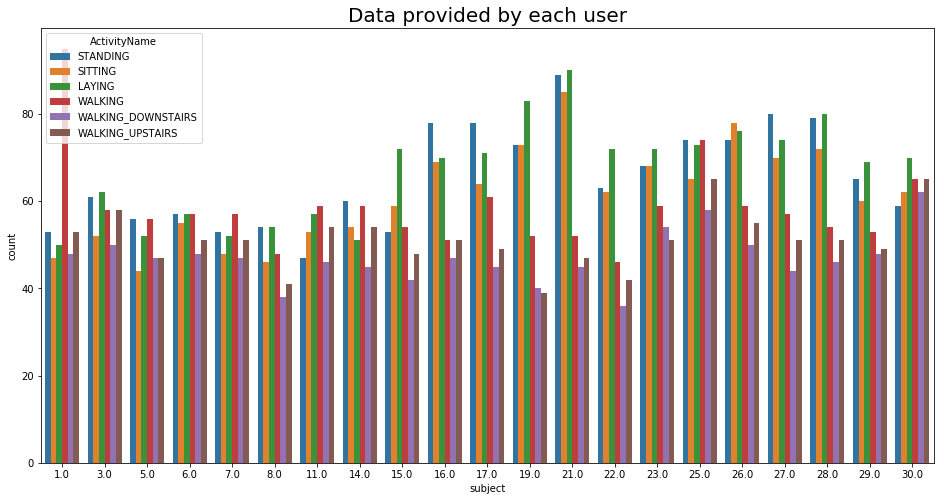

In [90]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

> We have got almost same number of reading from all the subjects

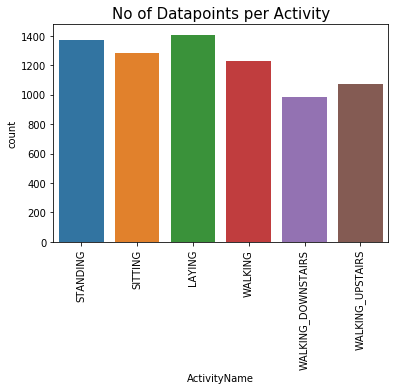

In [91]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train['ActivityName'])
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)
## 4. Changing feature names 

In [95]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

In [105]:
# Removing '()','-',',' from column names
# https://stackoverflow.com/a/39741442/10219869
# why we use this "[]"? by  Bowen Liu. Because it means regex for matching only '()' or '-' or ','. By jezrael

train.columns = train.columns.str.replace(r'[()]','')
train.columns = train.columns.str.replace(r'[-]','')
train.columns = train.columns.str.replace(r'[,]','')
train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [106]:
train.to_csv('train_new.csv', index=False)
test.to_csv('test_new.csv', index=False)

# Exploratory Data Analysis
"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"
### 1. Featuring Engineering from Domain Knowledge 
+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.

### 2. Stationary and Moving activities are completely different

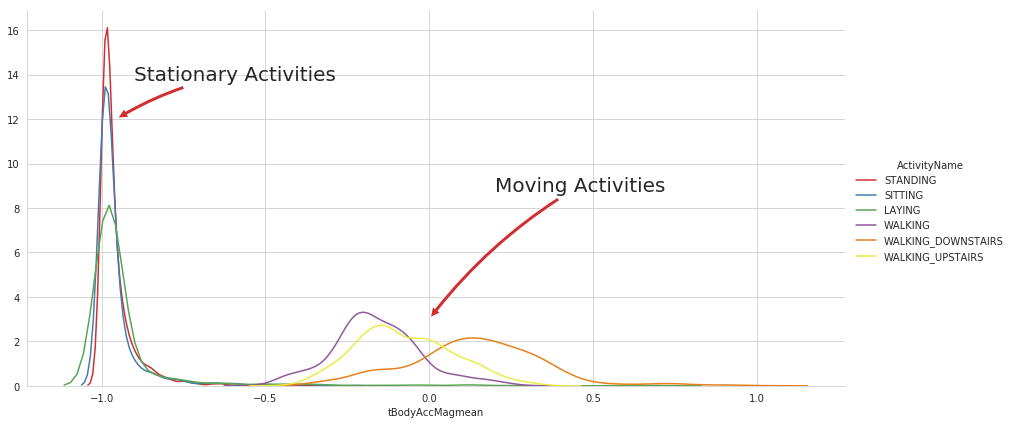

In [111]:
sns.set_style('whitegrid')

sns.set_palette("Set1", desat=0.80)

facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)

facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()

plt.annotate("Stationary Activities", xy= (-0.956,12), xytext= (-0.9, 14), size= 20,va= 'center', ha= 'left',
             arrowprops= dict(arrowstyle= "simple", connectionstyle= "arc3, rad= 0.1"))

plt.annotate("Moving Activities", xy= (0,3), xytext= (0.2, 9), size= 20, va= 'center', ha= 'left', 
             arrowprops= dict(arrowstyle= "simple", connectionstyle= "arc3, rad= 0.1"))

plt.show()

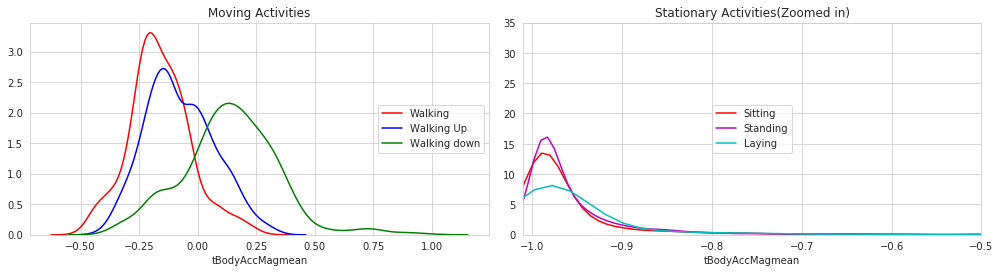

In [113]:

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Moving Activities')
sns.distplot(train[train['Activity']==1]['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(train[train['Activity']==2]['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(train[train['Activity']==3]['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')

plt.subplot(2,2,2)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(train[train['Activity']==4]['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(train[train['Activity']==5]['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(train[train['Activity']==6]['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can separate it well

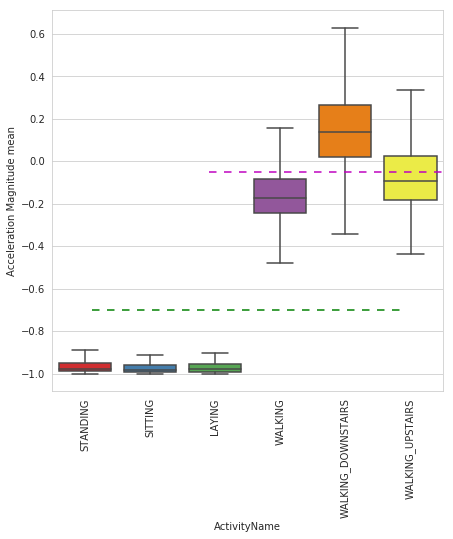

In [114]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.1 then the Activity is WalkingDownstairs.
- We can classify almost 75% the Acitivity labels with some errors.

### 4. Position of Gravity Acceleration Components also matters 

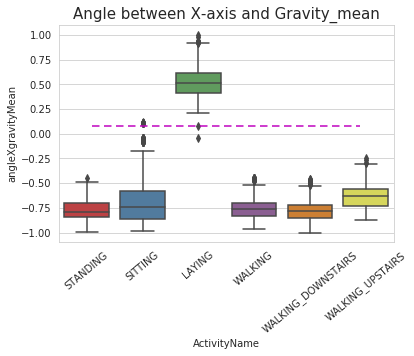

In [115]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX, gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

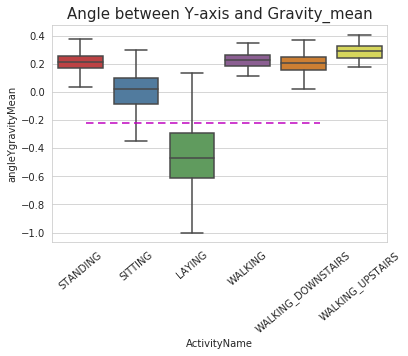

In [116]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply T-SNE on the data

In [128]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X, y, perplexities, n_iter=1000, img_name_prefix='T-SNE'):
        
    for index, perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nPerforming tsne with perplexity {} and with {} iterations at max\n'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose= 2, perplexity= perplexity).fit_transform(X)
        print('Done..')
        
        # prepare the data for seaborn         
        print('\nCreating plot for this T-SNE visualization..\n')
        df = pd.DataFrame({'x': X_reduced[:,0], 'y': X_reduced[:,1] ,'label': y})
        
        # draw the plot in appropriate place in the grid
        # fit_reg : If 'True', estimate and plot a regression model relating the x and y variables.
        sns.lmplot(data= df, x= 'x', y= 'y', hue= 'label', fit_reg= False, size= 8, palette="Set1", 
                   markers=['^', 'v', 's', 'o', '1', '2'])
        
        plt.title("Perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + 'New_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('\nSaving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



Performing tsne with perplexity 2 and with 1000 iterations at max

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.135s...
[t-SNE] Computed neighbors for 7351 samples in 30.775s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 0.635915
[t-SNE] Computed conditional probabilities in 0.063s
[t-SNE] Iteration 50: error = 124.6781464, gradient norm = 0.0262113 (50 iterations in 4.723s)
[t-SNE] Iteration 100: error = 107.3815079, gradient norm = 0.0308419 (50 iterations i

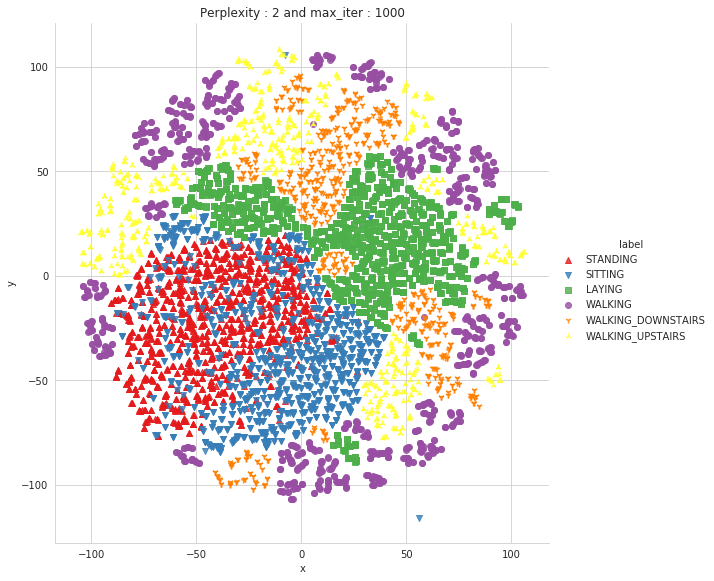

Done

Performing tsne with perplexity 5 and with 1000 iterations at max

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.127s...
[t-SNE] Computed neighbors for 7351 samples in 30.790s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 0.961278
[t-SNE] Computed conditional probabilities in 0.077s
[t-SNE] Iteration 50: error = 114.0015182, gradient norm = 0.0204809 (50 iterations in 8.726s)
[t-SNE] Iteration 100: error = 97.6693344, gradient norm = 0.0169447 (50 iterati

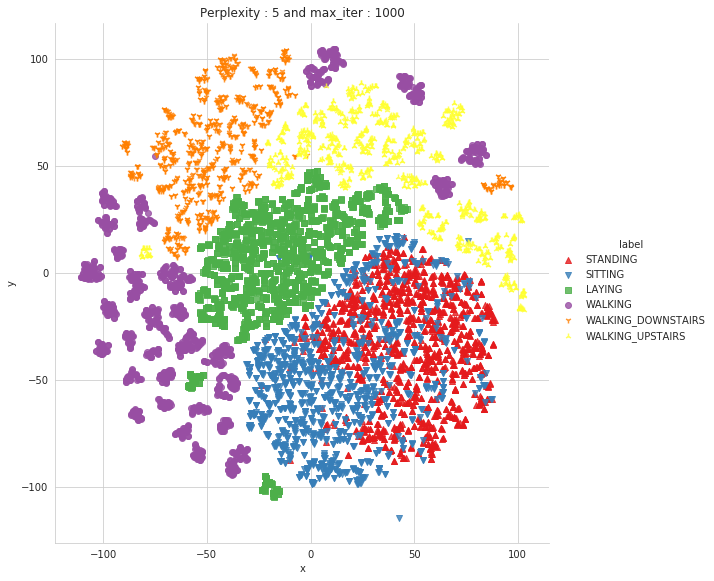

Done

Performing tsne with perplexity 10 and with 1000 iterations at max

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.129s...
[t-SNE] Computed neighbors for 7351 samples in 31.246s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.133834
[t-SNE] Computed conditional probabilities in 0.138s
[t-SNE] Iteration 50: error = 105.7958527, gradient norm = 0.0176003 (50 iterations in 3.840s)
[t-SNE] Iteration 100: error = 90.1865311, gradient norm = 0.0132296 (50 iterat

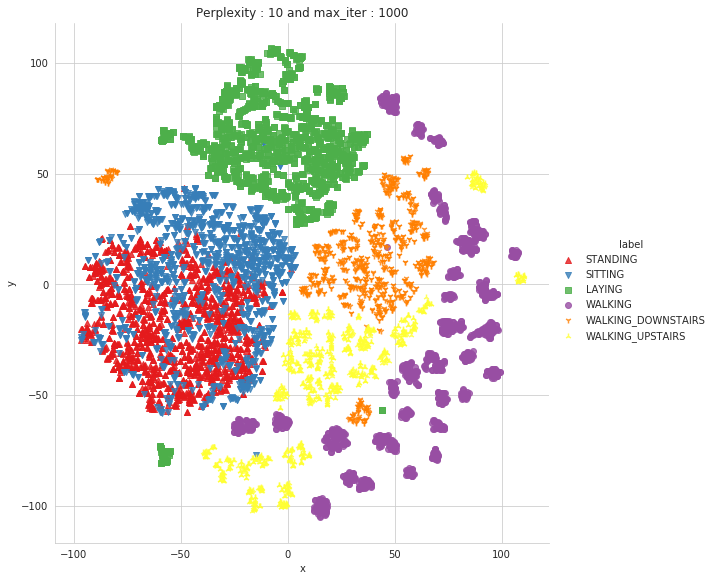

Done

Performing tsne with perplexity 30 and with 1000 iterations at max

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.138s...
[t-SNE] Computed neighbors for 7351 samples in 33.190s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.348514
[t-SNE] Computed conditional probabilities in 0.389s
[t-SNE] Iteration 50: error = 91.7951050, gradient norm = 0.0282668 (50 iterations in 4.036s)
[t-SNE] Iteration 100: error = 80.4392471, gradient norm = 0.0043850 (50 iterati

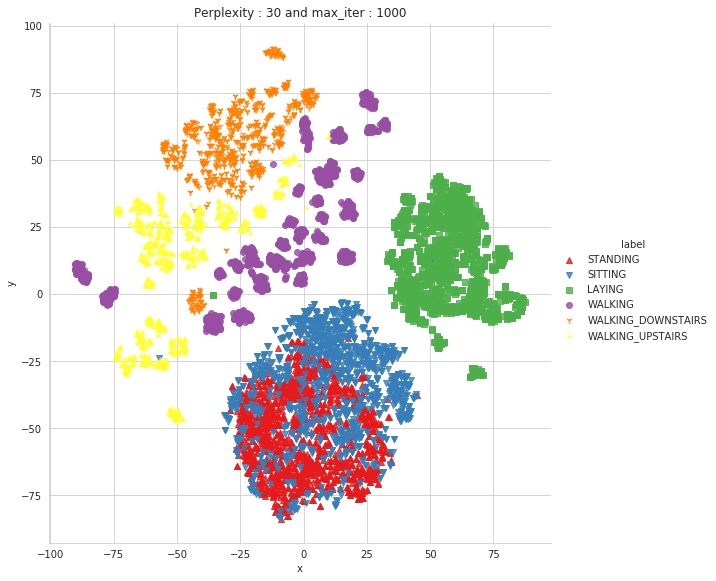

Done

Performing tsne with perplexity 50 and with 1000 iterations at max

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.162s...
[t-SNE] Computed neighbors for 7351 samples in 35.874s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.437667
[t-SNE] Computed conditional probabilities in 0.645s
[t-SNE] Iteration 50: error = 85.8026886, gradient norm = 0.0274312 (50 iterations in 4.849s)
[t-SNE] Iteration 100: error = 75.5111008, gradient norm = 0.0039719 (50 iterat

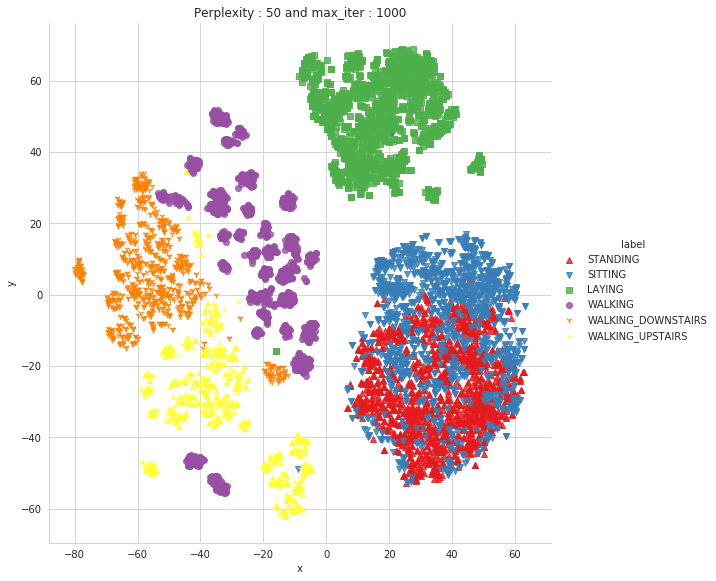

Done
Time to run the program:  0:07:04.016172


In [129]:
start = dt.datetime.now()

perform_tsne(X= train.drop(['subject', 'Activity','ActivityName'], axis=1) , y= train['ActivityName'], 
             perplexities =[2,5,10,30,50])

print('Time to run the program: ',dt.datetime.now()-start)

## Function to plot the confusion matrix

In [131]:
def plot_confusion_matrix(cm, classes,normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Generic function to run any model specified

In [157]:
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, print_cm=True, 
                  cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start = dt.datetime.now()
    print('Training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    results['training_time'] =  dt.datetime.now() - train_start
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start = dt.datetime.now()
    y_pred = model.predict(X_test)
    print('Done \n \n')
    results['testing_time'] = dt.datetime.now() - test_start
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true= y_test, y_pred= y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classification Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results    

## Method to print the gridsearch Attributes

In [134]:
def print_grid_search_attributes(model):
    
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

# 1. Logistic Regression with Grid Search

In [142]:
# deleting the particular rows in y

y_train.drop([7351], inplace= True)
y_test.drop([2946], inplace= True)

In [155]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train['ActivityName']

X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test['ActivityName']

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7351, 561),(7351,))
X_test  and y_test  : ((2946, 561),(2946,))


In [170]:
y_test.value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      470
WALKING_DOWNSTAIRS    420
Name: ActivityName, dtype: int64

Training the model..
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   53.1s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:01:02.688927


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.029037


---------------------
|      Accuracy      |
---------------------

    0.9626612355736592


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  57   0   0   4]
 [  0  12 519   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 448]]


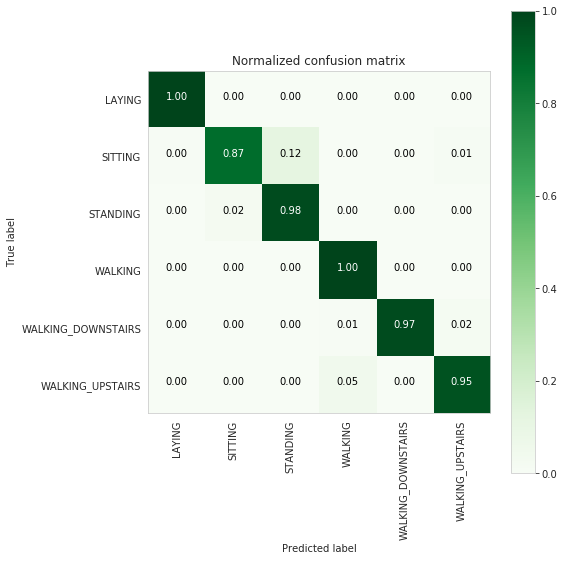

-------------------------
| Classification Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       470

          accuracy                           0.96      2946
         macro avg       0.97      0.96      0.96      2946
      weighted avg       0.96      0.96      0.96      2946



In [171]:
# start Grid search
parameters = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}

labels= ['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
log_reg_grid = GridSearchCV(linear_model.LogisticRegression(), param_grid= parameters, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels= labels)

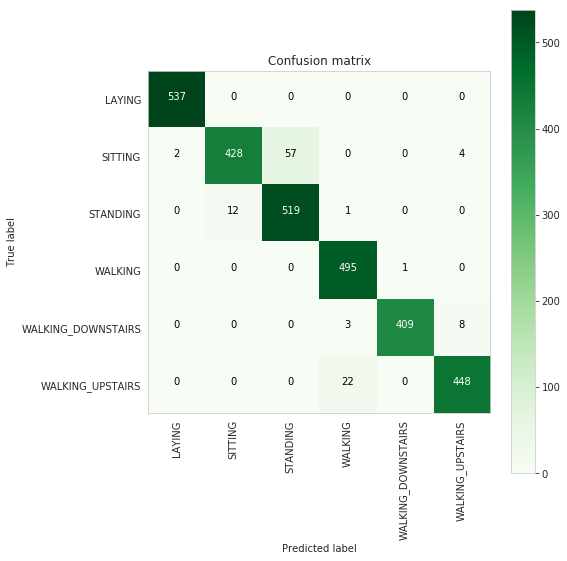

In [172]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [175]:
# observe the attributes of the model 

print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.946129778261461



#  2. Linear SVC with GridSearch

Training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   15.6s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:19.859823


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.028057


---------------------
|      Accuracy      |
---------------------

    0.9677528852681602


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 432  53   0   0   4]
 [  0  12 519   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  15   1 454]]


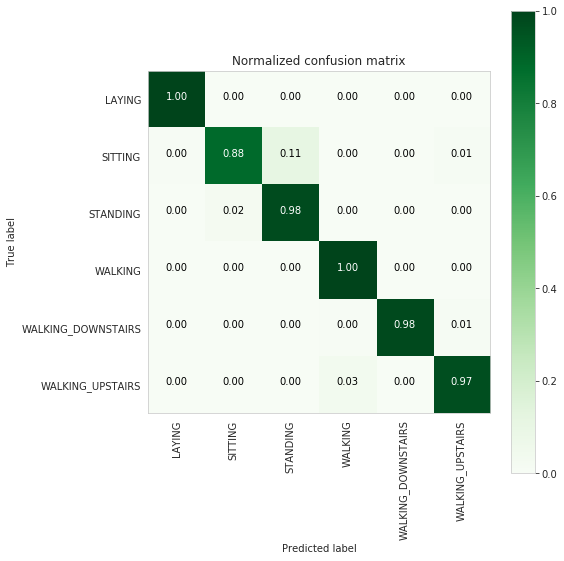

-------------------------
| Classification Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       470

          accuracy                           0.97      2946
         macro avg       0.97      0.97      0.97      2946
      weighted avg       0.97      0.97      0.97      2946



In [177]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}

lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)

lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [178]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 2}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.946129778261461



# 3.  Kernel SVM with GridSearch

Training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:02:07.059750


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.218311


---------------------
|      Accuracy      |
---------------------

    0.9626612355736592


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 452]]


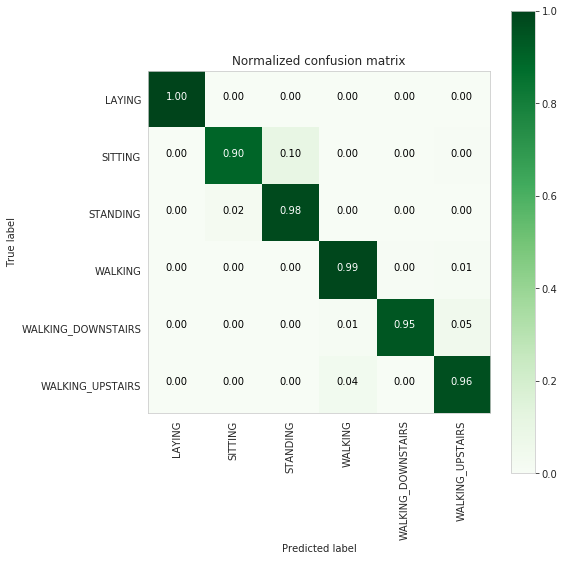

-------------------------
| Classification Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       470

          accuracy                           0.96      2946
         macro avg       0.96      0.96      0.96      2946
      weighted avg       0.96      0.96      0.96      2946



In [180]:
parameters = {'C':[2,8,16], 'gamma': [ 0.0078125, 0.125, 2]}

rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)

rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [181]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9440892395592436



# 4. Decision Trees with GridSearchCV

Training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:09.106136


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.004960


---------------------
|      Accuracy      |
---------------------

    0.8652410047522063


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 386 105   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 471  17   8]
 [  0   0   0  15 343  62]
 [  0   0   0  68  29 373]]


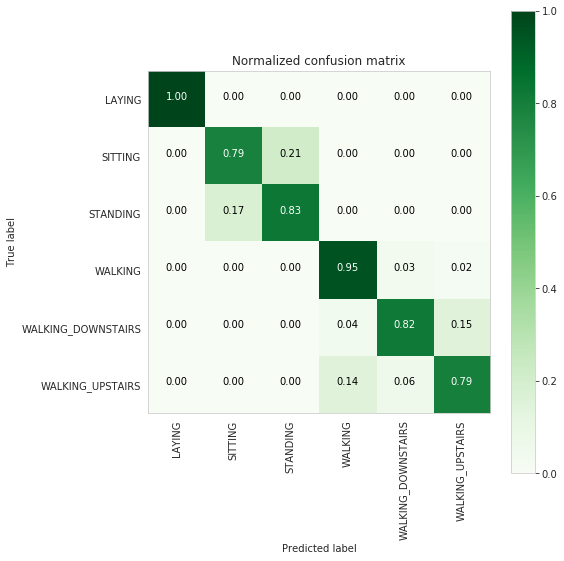

-------------------------
| Classification Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.85      0.95      0.90       496
WALKING_DOWNSTAIRS       0.88      0.82      0.85       420
  WALKING_UPSTAIRS       0.84      0.79      0.82       470

          accuracy                           0.87      2946
         macro avg       0.86      0.86      0.86      2946
      weighted avg       0.87      0.87      0.86      2946



In [185]:
parameters = {'max_depth':np.arange(3,10,2)}

dt_grid = GridSearchCV(DecisionTreeClassifier(),param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [186]:
print_grid_search_attributes(dt_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 7}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8401578016596382



# 5. Random Forest Classifier with GridSearch

Training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:03:08.064735


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.074593


---------------------
|      Accuracy      |
---------------------

    0.923285811269518


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 434  57   0   0   0]
 [  0  37 495   0   0   0]
 [  0   0   0 484   9   3]
 [  0   0   0  29 344  47]
 [  0   0   0  38   6 426]]


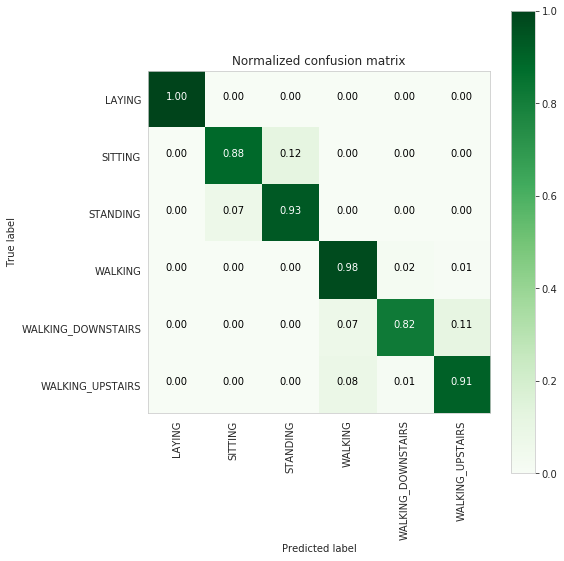

-------------------------
| Classification Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.88      0.90       491
          STANDING       0.90      0.93      0.91       532
           WALKING       0.88      0.98      0.92       496
WALKING_DOWNSTAIRS       0.96      0.82      0.88       420
  WALKING_UPSTAIRS       0.89      0.91      0.90       470

          accuracy                           0.92      2946
         macro avg       0.92      0.92      0.92      2946
      weighted avg       0.93      0.92      0.92      2946



In [188]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}

rfc_grid = GridSearchCV(RandomForestClassifier(), param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [189]:
print_grid_search_attributes(rfc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9, 'n_estimators': 150}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best est

# 6.  Gradient Boosted Decision Trees With GridSearch

Training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:29:52.221729


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.057789


---------------------
|      Accuracy      |
---------------------

    0.9202308214528174


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 396  94   0   0   1]
 [  0  39 493   0   0   0]
 [  0   0   0 482   7   7]
 [  0   0   0   7 372  41]
 [  0   1   0  34   4 431]]


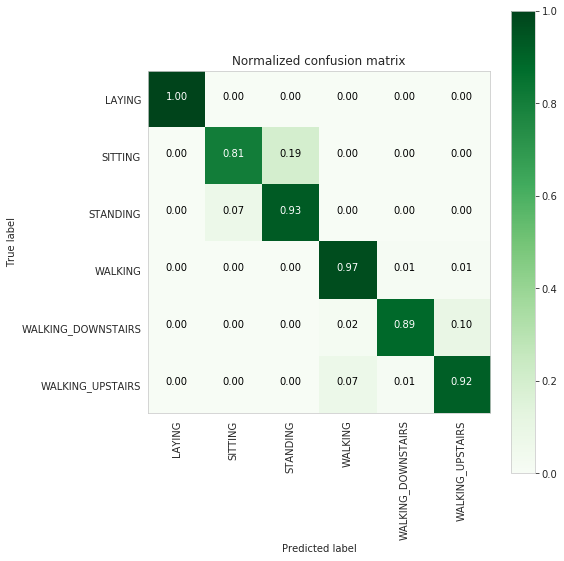

-------------------------
| Classification Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.81      0.85       491
          STANDING       0.84      0.93      0.88       532
           WALKING       0.92      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
  WALKING_UPSTAIRS       0.90      0.92      0.91       470

          accuracy                           0.92      2946
         macro avg       0.92      0.92      0.92      2946
      weighted avg       0.92      0.92      0.92      2946



In [191]:
param_grid = {'max_depth': np.arange(5,8,1), 'n_estimators':np.arange(130,170,10)}

gbdt_grid = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [192]:
print_grid_search_attributes(gbdt_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 5, 'n_estimators': 140}

---------------------------------
|   No of CrossValidation sets   |
--------------

# 7. Comparing all models

In [194]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%      {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%      {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.27%      3.734%
Linear SVC          : 96.78%      3.225% 
rbf SVM classifier  : 96.27%      3.734% 
DecisionTree        : 86.52%      13.48% 
Random Forest       : 92.33%      7.671% 
GradientBoosting DT : 92.33%      7.671% 


> We can choose ___Logistic regression___ or ___Linear SVC___ or ___rbf SVM___.

In the real world, domain-knowledge, EDA and feature-engineering matter most.

# LSTM

In [2]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration

SIGNALS = ["body_acc_x",
           "body_acc_y",
           "body_acc_z",
           "body_gyro_x",
           "body_gyro_y",
           "body_gyro_z",
           "total_acc_x",
           "total_acc_y",
           "total_acc_z"]

# Labelling the classes in y.
label = {0:'WALKING', 1:'WALKING_UPSTAIRS', 2:'WALKING_DOWNSTAIRS', 3:'SITTING', 4:'STANDING', 5:'LAYING'}

In [5]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([label[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([label[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []
    filename = 'body_acc_x_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_acc_y_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_acc_z_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_gyro_x_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_gyro_y_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_gyro_z_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'total_acc_x_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'total_acc_y_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'total_acc_z_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
        

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))


def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = 'y_{}.txt'.format(subset)
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [6]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

print('X_train shape is: ',X_train.shape)
print('Y_train shape is: ',Y_train.shape)
print('X_test shape is: ',X_test.shape)
print('Y_test shape is: ',Y_test.shape)

X_train shape is:  (7352, 128, 9)
Y_train shape is:  (7352, 6)
X_test shape is:  (2947, 128, 9)
Y_test shape is:  (2947, 6)


In [5]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [6]:
# Configuring a session
session_conf = tf.ConfigProto(intra_op_parallelism_threads= 1,
                              inter_op_parallelism_threads= 1)

In [7]:
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [8]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [9]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


- Defining the Architecture of LSTM and HyperParam Tuning

In [12]:
"""

# Initiliazing the sequential model
def best_model(units, activation, dropout_rate, optimizer):
    model = Sequential()
    # Configuring the parameters
    model.add(LSTM(units= units, activation= activation, recurrent_activation='sigmoid', use_bias=True, 
                   kernel_initializer= 'he_normal', recurrent_initializer='orthogonal', bias_initializer='zeros', 
                   unit_forget_bias= True, kernel_regularizer= regularizers.l2(0.001), recurrent_regularizer=None, 
                   bias_regularizer= None, activity_regularizer= None, kernel_constraint=None, recurrent_constraint=None, 
                   bias_constraint=None, dropout= dropout_rate, recurrent_dropout=0.0, implementation=2, 
                   return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False, 
                   input_shape=(timesteps, input_dim)))
    
    model.add(Dropout(dropout_rate))
    # Adding a dense output layer with sigmoid activation
    model.add(Dense(n_classes, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    
    return model

"""

In [ ]:
"""

# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

parameters = {'units':        [64, 128],
              'dropout_rate': [0.4, 0.5],
              'activation':   ['relu', 'sigmoid'],
              'optimizer':    ['rmsprop', 'adam']
              }

model = KerasClassifier(build_fn= best_model, epochs= 30)

gscv = GridSearchCV(estimator = model, param_grid= parameters, n_jobs= -1, )
gscv_result = gscv.fit(X_train, Y_train)

"""

In [ ]:
"""
print(gscv_result.best_estimator_)
print(gscv_result.best_score_)
"""

# TRYING VARIOUS ARCHITECTURES
### ONE

In [11]:
# Initializing parameters
epochs = 100
batch_size = 70
n_hidden = 32

In [12]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, kernel_initializer= 'he_normal', kernel_regularizer= regularizers.l2(0.001), 
               input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Training the model
model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7352 samples, validate on 2947 samples
Epoch 1/100
7352/7352 [==============================] - 26s 3ms/step - loss: 1.8124 - accuracy: 0.3704 - val_loss: 1.5818 - val_accuracy: 0.5616
Epoch 2/100
7352/7352 [==============================] - 22s 3ms/step - loss: 1.4089 - accuracy: 0.5627 - val_loss: 1.2032 - val_accuracy: 0.6223
Epoch 3/100
7352/7352 [==============================] - 22s 3ms/step - loss: 1.2056 - accuracy: 0.5953 - val_loss: 1.3546 - val_accuracy: 0.4795
Epoch 4/100
7352/7352 [==============================] - 22s 3ms/step - loss: 1.1868 - accuracy: 0.5842 - val_loss: 1.1455 - val_accuracy: 0.5762
Epoch 5/100
7352/7352 [==============================] - 22s 3ms/step - loss: 1.0489 - accuracy: 0.6428 - val_loss: 1.0075 - val_accuracy: 0.6515
Epoch 6/100
7352/7352 [==============================] - 22s 3ms/step - loss: 0.9469 - accuracy: 0.6534 - val_loss: 0.9429 - va

In [15]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      408        57        0                   0   
STANDING                 0      101       429        2                   0   
WALKING                  0        1         0      452                  41   
WALKING_DOWNSTAIRS       0        0         0        1                 411   
WALKING_UPSTAIRS         0        2         1       15                  30   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                           26  
STANDING                           0  
WALKING                            2  
WALKING_DOWNSTAIRS                 8  
WALKING_UPSTAIRS                 423  


In [16]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 2s 699us/step


In [17]:
score

[0.5093596800744614, 0.9026128053665161]

### TWO

In [11]:
# Initializing parameters
epochs = 100
batch_size = 70
n_hidden = 64

In [12]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, kernel_initializer= 'he_normal', kernel_regularizer= regularizers.l2(0.001), 
               input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                18944     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 19,334
Trainable params: 19,334
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Training the model
model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7352 samples, validate on 2947 samples
Epoch 1/100
7352/7352 [==============================] - 31s 4ms/step - loss: 1.7981 - accuracy: 0.4913 - val_loss: 1.4045 - val_accuracy: 0.5769
Epoch 2/100
7352/7352 [==============================] - 27s 4ms/step - loss: 1.1737 - accuracy: 0.6666 - val_loss: 1.1122 - val_accuracy: 0.6420
Epoch 3/100
7352/7352 [==============================] - 27s 4ms/step - loss: 0.9348 - accuracy: 0.7304 - val_loss: 0.9110 - val_accuracy: 0.7180
Epoch 4/100
7352/7352 [==============================] - 27s 4ms/step - loss: 0.8217 - accuracy: 0.7598 - val_loss: 0.9339 - val_accuracy: 0.6926
Epoch 5/100
7352/7352 [==============================] - 27s 4ms/step - loss: 0.7525 - accuracy: 0.7637 - val_loss: 0.8540 - val_accuracy: 0.6817
Epoch 6/100
7352/7352 [==============================] - 27s 4ms/step - loss: 0.7081 - accuracy: 0.7560 - val_loss: 0.7580 - va

In [15]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0         0        0                   0   
SITTING                  0      414        60        0                   0   
STANDING                 0      125       402        1                   0   
WALKING                  0        0         0      465                  30   
WALKING_DOWNSTAIRS       0        0         0        1                 414   
WALKING_UPSTAIRS         0        0         0       21                  13   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            27  
SITTING                           17  
STANDING                           4  
WALKING                            1  
WALKING_DOWNSTAIRS                 5  
WALKING_UPSTAIRS                 437  


In [16]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 3s 880us/step


In [17]:
score

[0.3748672223941609, 0.8965049386024475]

### THREE

In [11]:
# Initializing parameters
epochs = 50
batch_size = 70
n_hidden1 = 32
n_hidden2 = 64

In [12]:
# https://machinelearningmastery.com/stacked-long-short-term-memory-networks/
# Initiliazing the sequential model
model = Sequential()

# Configuring the parameters
model.add(LSTM(n_hidden1, kernel_initializer= 'he_normal', kernel_regularizer= regularizers.l2(0.001), 
               return_sequences=True, input_shape=(timesteps, input_dim)))
model.add(LSTM(n_hidden2, kernel_initializer= 'he_normal', kernel_regularizer= regularizers.l2(0.001), 
               input_shape=(timesteps, input_dim)))

# Adding a dropout layer
model.add(Dropout(0.5))

# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 30,598
Trainable params: 30,598
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Training the model
model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7352 samples, validate on 2947 samples
Epoch 1/50
7352/7352 [==============================] - 59s 8ms/step - loss: 1.7838 - accuracy: 0.5563 - val_loss: 1.3617 - val_accuracy: 0.6169
Epoch 2/50
7352/7352 [==============================] - 54s 7ms/step - loss: 1.1699 - accuracy: 0.7043 - val_loss: 1.1542 - val_accuracy: 0.6926
Epoch 3/50
7352/7352 [==============================] - 55s 8ms/step - loss: 0.8993 - accuracy: 0.8112 - val_loss: 0.9296 - val_accuracy: 0.7777
Epoch 4/50
7352/7352 [==============================] - 55s 7ms/step - loss: 0.6931 - accuracy: 0.8781 - val_loss: 0.7331 - val_accuracy: 0.8656
Epoch 5/50
7352/7352 [==============================] - 55s 8ms/step - loss: 0.5502 - accuracy: 0.9166 - val_loss: 0.7542 - val_accuracy: 0.8507
Epoch 6/50
7352/7352 [==============================] - 56s 8ms/step - loss: 0.4851 - accuracy: 0.9215 - val_loss: 0.7129 - val_accu

In [15]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0         0        0                   0   
SITTING                  0      349       119        0                   0   
STANDING                 0       46       480        4                   0   
WALKING                  0        0         0      460                  20   
WALKING_DOWNSTAIRS       0        0         0        4                 404   
WALKING_UPSTAIRS         0        2         0        5                  33   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            27  
SITTING                           23  
STANDING                           2  
WALKING                           16  
WALKING_DOWNSTAIRS                12  
WALKING_UPSTAIRS                 431  


In [16]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 5s 2ms/step


In [17]:
score

[0.5485815121676908, 0.8937903046607971]

### FOUR

In [11]:
# Initializing parameters
epochs = 50
batch_size = 70
n_hidden1 = 32
n_hidden2 = 64

In [12]:
# https://machinelearningmastery.com/stacked-long-short-term-memory-networks/
# Initiliazing the sequential model
model = Sequential()

# Configuring the parameters
model.add(LSTM(n_hidden1, kernel_regularizer= regularizers.l2(0.01), return_sequences=True, 
               input_shape=(timesteps, input_dim)))
model.add(LSTM(n_hidden2, kernel_regularizer= regularizers.l2(0.01), input_shape=(timesteps, input_dim)))

# Adding a dropout layer
model.add(Dropout(0.5))

# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 30,598
Trainable params: 30,598
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Training the model
model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7352 samples, validate on 2947 samples
Epoch 1/50
7352/7352 [==============================] - 54s 7ms/step - loss: 1.8588 - accuracy: 0.3343 - val_loss: 1.5992 - val_accuracy: 0.3271
Epoch 2/50
7352/7352 [==============================] - 50s 7ms/step - loss: 1.4525 - accuracy: 0.3625 - val_loss: 1.4467 - val_accuracy: 0.4075
Epoch 3/50
7352/7352 [==============================] - 50s 7ms/step - loss: 1.2425 - accuracy: 0.4854 - val_loss: 1.2867 - val_accuracy: 0.4388
Epoch 4/50
7352/7352 [==============================] - 51s 7ms/step - loss: 1.2264 - accuracy: 0.4887 - val_loss: 1.3395 - val_accuracy: 0.5215
Epoch 5/50
7352/7352 [==============================] - 51s 7ms/step - loss: 1.2145 - accuracy: 0.5014 - val_loss: 1.2318 - val_accuracy: 0.5531
Epoch 6/50
7352/7352 [==============================] - 51s 7ms/step - loss: 1.2475 - accuracy: 0.4803 - val_loss: 1.2367 - val_accu

In [15]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING
True                                                  
LAYING                 534        2         0        1
SITTING                  0      209       255       27
STANDING                 0       17       488       27
WALKING                  0        0         4      492
WALKING_DOWNSTAIRS       0        0         0      420
WALKING_UPSTAIRS         0        0         2      469


In [16]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 5s 2ms/step


In [17]:
score

[0.8606069580271642, 0.5846623778343201]

### Five

In [11]:
# Initializing parameters
epochs = 50
batch_size = 70
n_hidden1 = 32
n_hidden2 = 64

In [12]:
# https://machinelearningmastery.com/stacked-long-short-term-memory-networks/
# Initiliazing the sequential model
model = Sequential()

# Configuring the parameters
model.add(LSTM(n_hidden1, kernel_initializer= 'glorot_normal', kernel_regularizer= regularizers.l2(0.001), return_sequences=True, 
               input_shape=(timesteps, input_dim)))
model.add(LSTM(n_hidden2, kernel_initializer= 'glorot_normal', kernel_regularizer= regularizers.l2(0.001), input_shape=(timesteps, input_dim)))

# Adding a dropout layer
model.add(Dropout(0.5))

# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 30,598
Trainable params: 30,598
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Training the model
model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7352 samples, validate on 2947 samples
Epoch 1/50
7352/7352 [==============================] - 52s 7ms/step - loss: 1.3953 - accuracy: 0.4257 - val_loss: 1.1349 - val_accuracy: 0.5497
Epoch 2/50
7352/7352 [==============================] - 48s 7ms/step - loss: 0.9486 - accuracy: 0.5951 - val_loss: 0.9072 - val_accuracy: 0.5952
Epoch 3/50
7352/7352 [==============================] - 48s 7ms/step - loss: 0.8026 - accuracy: 0.6359 - val_loss: 0.8386 - val_accuracy: 0.6359
Epoch 4/50
7352/7352 [==============================] - 48s 7ms/step - loss: 0.7337 - accuracy: 0.6488 - val_loss: 0.7468 - val_accuracy: 0.5908
Epoch 5/50
7352/7352 [==============================] - 48s 7ms/step - loss: 0.7845 - accuracy: 0.6292 - val_loss: 0.7871 - val_accuracy: 0.6383
Epoch 6/50
7352/7352 [==============================] - 48s 7ms/step - loss: 0.7039 - accuracy: 0.6635 - val_loss: 0.8010 - val_accu

In [15]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0         0        0                   0   
SITTING                  5      383        97        6                   0   
STANDING                 0      101       430        1                   0   
WALKING                  0        0         0      470                   2   
WALKING_DOWNSTAIRS       0        0         0        0                 407   
WALKING_UPSTAIRS         0        0         0       49                  11   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            27  
SITTING                            0  
STANDING                           0  
WALKING                           24  
WALKING_DOWNSTAIRS                13  
WALKING_UPSTAIRS                 411  


In [16]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 4s 1ms/step


In [17]:
score

[0.4328820135433026, 0.8859857320785522]

# CNN
### Divide and Conquer-Based 1D CNN

In [5]:
from keras import regularizers

In [23]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration

SIGNALS = ["body_acc_x",
           "body_acc_y",
           "body_acc_z",
           "body_gyro_x",
           "body_gyro_y",
           "body_gyro_z",
           "total_acc_x",
           "total_acc_y",
           "total_acc_z"]

# Labelling the classes in y.
label = {0:'WALKING', 1:'WALKING_UPSTAIRS', 2:'WALKING_DOWNSTAIRS', 3:'SITTING', 4:'STANDING', 5:'LAYING'}

In [4]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([label[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([label[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [6]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []
    filename = 'body_acc_x_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_acc_y_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_acc_z_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_gyro_x_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_gyro_y_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_gyro_z_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'total_acc_x_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'total_acc_y_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'total_acc_z_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
        

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))


def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = 'y_{}.txt'.format(subset)
    y = _read_csv(filename)[0]
    
    # Dynamic activities
    y[y<=3] = 0
    
    # Static activities
    y[y>3] = 1

    return pd.get_dummies(y).as_matrix()

def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error

def plt_dynamic(x, vy, ty, ax, color = 'b'):
    ax.plot(x, vy, 'b', label = 'Validation Loss')
    ax.plot(x, vy, 'b', label = 'Validation Loss')
    ax.plot(x, ty, 'r', label = 'Train Loss')
    plt.grid()
    plt.legend()
    fig.canvas.draw()

In [7]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

print('X_train shape is: ',X_train.shape)
print('Y_train shape is: ',Y_train.shape)
print('X_test shape is: ',X_test.shape)
print('Y_test shape is: ',Y_test.shape)

X_train shape is:  (7352, 128, 9)
Y_train shape is:  (7352, 2)
X_test shape is:  (2947, 128, 9)
Y_test shape is:  (2947, 2)


In [8]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [9]:
# Configuring a session
session_conf = tf.ConfigProto(intra_op_parallelism_threads= 1,
                              inter_op_parallelism_threads= 1)

In [10]:
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [11]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [12]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [13]:
model1= Sequential()
model1.add(Conv1D(filters= 32, kernel_size= 3, activation= 'relu', kernel_initializer= 'he_normal', 
                  kernel_regularizer = regularizers.l2(0.1), input_shape=(timesteps, input_dim)))
model1.add(Dropout(0.5))
model1.add(MaxPooling1D(pool_size= 2))
model1.add(Flatten())
model1.add(Dense(units= 2, activation= 'softmax'))
model1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 126, 32)           896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 126, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 63, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2016)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4034      
Total params: 4,930
Trainable params: 4,930
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compiling the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Initializing parameters
epochs = 10
batch_size = 70

# Training the model
history1= model1.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs)


Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 5s 647us/step - loss: 4.8197 - accuracy: 0.9234 - val_loss: 3.3904 - val_accuracy: 0.9817
Epoch 2/10
7352/7352 [==============================] - 2s 251us/step - loss: 2.4643 - accuracy: 0.9959 - val_loss: 1.7946 - val_accuracy: 0.9915
Epoch 3/10
7352/7352 [==============================] - 2s 250us/step - loss: 1.2884 - accuracy: 0.9978 - val_loss: 0.9574 - val_accuracy: 0.9939
Epoch 4/10
7352/7352 [==============================] - 2s 257us/step - loss: 0.6708 - accuracy: 0.9984 - val_loss: 0.5187 - val_accuracy: 0.9966
Epoch 5/10
7352/7352 [==============================] - 2s 258us/step - loss: 0.3508 - accuracy: 0.9986 - val_loss: 0.2916 - val_accuracy: 0.9949
Epoch 6/10
7352/7352 [==============================] - 2s 255us/step - loss: 0.1885 - accuracy: 0.9990 - val_loss: 0.1809 - val_accuracy: 0.9929
Epoch 7/10
7352/7352 [==============================] - 2s 250us/step - los

In [17]:
score1 = model1.evaluate(X_test, Y_test)

2947/2947 [==============================] - 0s 112us/step


In [18]:
score1

[0.06726545751762261, 0.9983033537864685]

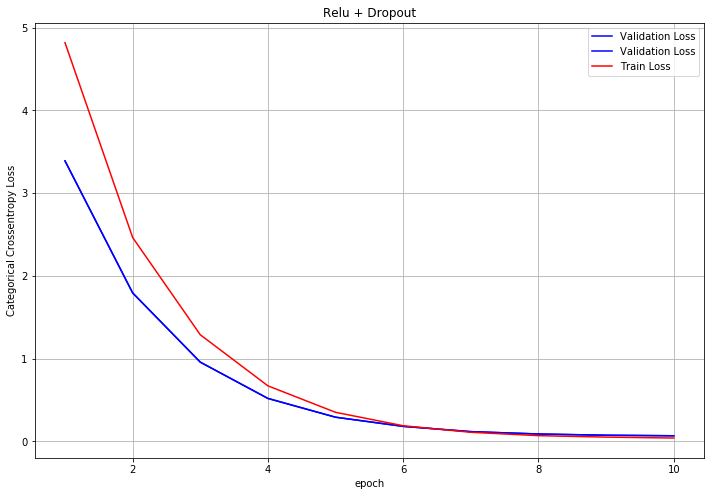

In [19]:
fig, ax = plt.subplots(1,1, figsize = (12, 8))
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
plt.title('Relu + Dropout')

# list of epoch numbers: epoch = 10
x = list(range(1,10+1))
vy = history1.history['val_loss']
ty = history1.history['loss']
plt_dynamic(x, vy, ty, ax)

In [20]:
import pickle
model1.save('model1')

# Classification of Static Activities

In [62]:
SIGNALS = ["body_acc_x",
           "body_acc_y",
           "body_acc_z",
           "body_gyro_x",
           "body_gyro_y",
           "body_gyro_z",
           "total_acc_x",
           "total_acc_y",
           "total_acc_z"]

# Labelling the classes in 'y' before OHE {4:'SITTING', 5:'STANDING', 6:'LAYING'}
# Labelling the classes in 'y' after OHE
label = {0:'SITTING', 1:'STANDING', 2:'LAYING'}

# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []
    filename = 'body_acc_x_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_acc_y_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_acc_z_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_gyro_x_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_gyro_y_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_gyro_z_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'total_acc_x_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'total_acc_y_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'total_acc_z_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
        

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([label[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([label[y] for y in np.argmax(Y_pred, axis=1)])
    
    c_m = pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

    plt.figure(figsize= (8, 6))
    c_m = sns.heatmap(c_m, annot=True, cmap= sns.light_palette("blue"), fmt=".3f", xticklabels=label.values(), 
                      yticklabels= label.values())
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    
    return c_m

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error

def plt_dynamic(x, vy, ty, ax, color = 'b'):
    ax.plot(x, vy, 'b', label = 'Validation Loss')
    ax.plot(x, vy, 'b', label = 'Validation Loss')
    ax.plot(x, ty, 'r', label = 'Train Loss')
    plt.grid()
    plt.legend()
    fig.canvas.draw()

In [15]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = 'y_{}.txt'.format(subset)
    y = _read_csv(filename)[0]
    
    # Static activities
    y_subset = y>3
    y = y[y_subset] 

    return pd.get_dummies(y).as_matrix(), y_subset

def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_train1 = load_y('train')
    y_test, y_test1 =  load_y('test')
    # collecting those datapoints where y > 3
    
    X_train = X_train[y_train1]
    X_test = X_test[y_test1]

    return X_train, X_test, y_train, y_test


In [16]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

print('X_train shape is: ',X_train.shape)
print('Y_train shape is: ',Y_train.shape)
print('X_test shape is: ',X_test.shape)
print('Y_test shape is: ',Y_test.shape)

X_train shape is:  (4067, 128, 9)
Y_train shape is:  (4067, 3)
X_test shape is:  (1560, 128, 9)
Y_test shape is:  (1560, 3)


In [24]:
# checking the y label and middle 1 is 'standing'
Y_train[:5]

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

In [25]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [26]:
# Configuring a session
session_conf = tf.ConfigProto(intra_op_parallelism_threads= 1,
                              inter_op_parallelism_threads= 1)

In [27]:
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [28]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [29]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print('Timesteps:', timesteps)
print('Input Dim:', input_dim)
print('No. of Train datapoints:', len(X_train))
print('No of classes:',n_classes)

Timesteps: 128
Input Dim: 9
No. of Train datapoints: 4067
No of classes: 3


### Arrived at this architecture after 50+ trails of architectures.

In [71]:
m= Sequential()
m.add(Conv1D(filters= 64, kernel_size= 5, activation= 'relu', kernel_initializer= 'he_uniform', 
                  input_shape=(timesteps, input_dim)))
m.add(Conv1D(filters= 64, kernel_size= 5, activation= 'relu', kernel_initializer= 'he_uniform'))
m.add(MaxPooling1D(pool_size= 2, padding= 'same'))
m.add(Dropout(0.40))
m.add(Conv1D(filters= 32, kernel_size= 5, activation= 'relu', kernel_initializer= 'he_uniform'))
m.add(Conv1D(filters= 32, kernel_size= 5, activation= 'relu', kernel_initializer= 'he_uniform',))

# https://stackoverflow.com/a/49089027/10219869
# https://stackoverflow.com/a/58498450/10219869
m.add(MaxPooling1D(pool_size= 2, padding= 'same'))
m.add(BatchNormalization())
m.add(Dropout(0.40))
m.add(Flatten())
m.add(Dense(units= 100, activation= 'relu'))
m.add(BatchNormalization())           
m.add(Dropout(0.40))
m.add(Dense(units= 3, activation= 'softmax'))
m.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, 124, 64)           2944      
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 120, 64)           20544     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 60, 64)            0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 60, 64)            0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 56, 32)            10272     
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 52, 32)            5152      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 26, 32)           

In [82]:
# https://keras.io/optimizers/
# Compiling the model
adam= keras.optimizers.Adam(learning_rate= 0.001)
rmsprop = optimizers.RMSprop(learning_rate= 0.001)
m.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [83]:
# Initializing parameters
epochs = 100
batch_size = 20

# Training the model
h= m.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs)

Train on 4067 samples, validate on 1560 samples
Epoch 1/100
4067/4067 [==============================] - 9s 2ms/step - loss: 0.0424 - accuracy: 0.9894 - val_loss: 0.5055 - val_accuracy: 0.9026
Epoch 2/100
4067/4067 [==============================] - 6s 1ms/step - loss: 0.0421 - accuracy: 0.9899 - val_loss: 0.4361 - val_accuracy: 0.9218
Epoch 3/100
4067/4067 [==============================] - 6s 1ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.4946 - val_accuracy: 0.9128
Epoch 4/100
4067/4067 [==============================] - 6s 1ms/step - loss: 0.0668 - accuracy: 0.9865 - val_loss: 0.3612 - val_accuracy: 0.9224
Epoch 5/100
4067/4067 [==============================] - 6s 1ms/step - loss: 0.0144 - accuracy: 0.9951 - val_loss: 0.3314 - val_accuracy: 0.9218
Epoch 6/100
4067/4067 [==============================] - 6s 1ms/step - loss: 0.0186 - accuracy: 0.9948 - val_loss: 0.3938 - val_accuracy: 0.9205
Epoch 7/100
4067/4067 [==============================] - 6s 1ms/step - loss: 0.020

In [84]:
s= m.evaluate(X_test, Y_test)

1560/1560 [==============================] - 0s 267us/step


In [85]:
s

[0.471027467745917, 0.9217948913574219]

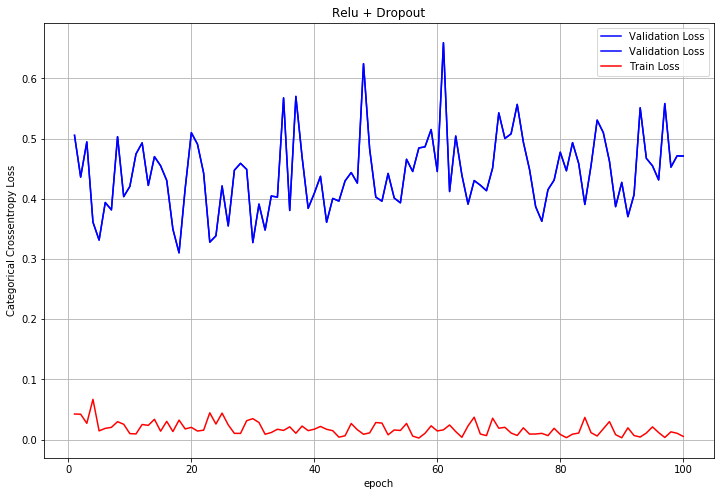

In [86]:
fig, ax = plt.subplots(1,1, figsize = (12, 8))
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
plt.title('Relu + Dropout')

# list of epoch numbers: epoch = 100
x = list(range(1,100+1))
vy = h.history['val_loss']
ty = h.history['loss']
plt_dynamic(x, vy, ty, ax)

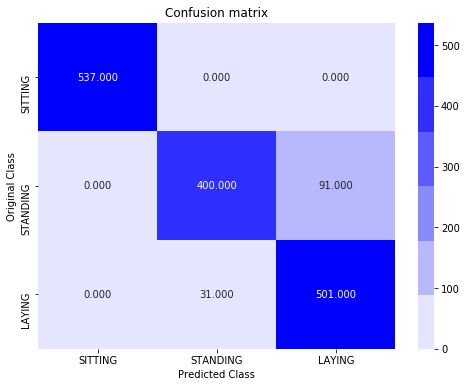

In [111]:
confusion_matrix(Y_test, m.predict(X_test))

In [79]:
model2.save('model2')

# Classification of Dynamic Activities

In [112]:
SIGNALS = ["body_acc_x",
           "body_acc_y",
           "body_acc_z",
           "body_gyro_x",
           "body_gyro_y",
           "body_gyro_z",
           "total_acc_x",
           "total_acc_y",
           "total_acc_z"]

# Labelling the classes in 'y' before OHE {1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS'}
# Labelling the classes in 'y' after OHE
label = {0:'WALKING', 1:'WALKING_UPSTAIRS', 2:'WALKING_DOWNSTAIRS'}

# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []
    filename = 'body_acc_x_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_acc_y_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_acc_z_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_gyro_x_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_gyro_y_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_gyro_z_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'total_acc_x_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'total_acc_y_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'total_acc_z_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
        

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

def confusion_matrix(Y_true, Y_pred):
    
    Y_true = pd.Series([label[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([label[y] for y in np.argmax(Y_pred, axis=1)])
    
    c_m = pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

    plt.figure(figsize= (8, 6))
    c_m = sns.heatmap(c_m, annot=True, cmap= sns.light_palette("blue"), fmt=".3f", xticklabels=label.values(), 
                      yticklabels= label.values())
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    return c_m

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error

def plt_dynamic(x, vy, ty, ax, color = 'b'):
    ax.plot(x, vy, 'b', label = 'Validation Loss')
    ax.plot(x, vy, 'b', label = 'Validation Loss')
    ax.plot(x, ty, 'r', label = 'Train Loss')
    plt.grid()
    plt.legend()
    fig.canvas.draw()

In [113]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = 'y_{}.txt'.format(subset)
    y = _read_csv(filename)[0]
    
    # Static activities
    y_subset = y<=3
    y = y[y_subset] 

    return pd.get_dummies(y).as_matrix(), y_subset

def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_train1 = load_y('train')
    y_test, y_test1 =  load_y('test')
    # collecting those datapoints where y > 3
    
    X_train = X_train[y_train1]
    X_test = X_test[y_test1]

    return X_train, X_test, y_train, y_test


In [114]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

print('X_train shape is: ',X_train.shape)
print('Y_train shape is: ',Y_train.shape)
print('X_test shape is: ',X_test.shape)
print('Y_test shape is: ',Y_test.shape)

X_train shape is:  (3285, 128, 9)
Y_train shape is:  (3285, 3)
X_test shape is:  (1387, 128, 9)
Y_test shape is:  (1387, 3)


In [115]:
# checking the y label and middle 1 is 'standing'
Y_train[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [116]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [117]:
# Configuring a session
session_conf = tf.ConfigProto(intra_op_parallelism_threads= 1,
                              inter_op_parallelism_threads= 1)

In [118]:
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [119]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [120]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print('Timesteps:', timesteps)
print('Input Dim:', input_dim)
print('No. of Train datapoints:', len(X_train))
print('No of classes:',n_classes)

Timesteps: 128
Input Dim: 9
No. of Train datapoints: 3285
No of classes: 3


In [121]:
m= Sequential()
m.add(Conv1D(filters= 64, kernel_size= 5, activation= 'relu', kernel_initializer= 'he_uniform', 
                  input_shape=(timesteps, input_dim)))
m.add(Conv1D(filters= 64, kernel_size= 5, activation= 'relu', kernel_initializer= 'he_uniform'))
m.add(MaxPooling1D(pool_size= 2, padding= 'same'))
m.add(Dropout(0.40))
m.add(Conv1D(filters= 32, kernel_size= 5, activation= 'relu', kernel_initializer= 'he_uniform'))
m.add(Conv1D(filters= 32, kernel_size= 5, activation= 'relu', kernel_initializer= 'he_uniform',))

# https://stackoverflow.com/a/49089027/10219869
# https://stackoverflow.com/a/58498450/10219869
m.add(MaxPooling1D(pool_size= 2, padding= 'same'))
m.add(BatchNormalization())
m.add(Dropout(0.40))
m.add(Flatten())
m.add(Dense(units= 100, activation= 'relu'))
m.add(BatchNormalization())           
m.add(Dropout(0.40))
m.add(Dense(units= 3, activation= 'softmax'))
m.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_41 (Conv1D)           (None, 124, 64)           2944      
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 120, 64)           20544     
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 60, 64)            0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 60, 64)            0         
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 56, 32)            10272     
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 52, 32)            5152      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 26, 32)          

In [122]:
# https://keras.io/optimizers/
# Compiling the model
adam= keras.optimizers.Adam(learning_rate= 0.001)
rmsprop = optimizers.RMSprop(learning_rate= 0.001)
m.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [123]:
# Initializing parameters
epochs = 100
batch_size = 20

# Training the model
h= m.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs)

Train on 3285 samples, validate on 1387 samples
Epoch 1/100
3285/3285 [==============================] - 8s 3ms/step - loss: 1.0449 - accuracy: 0.5945 - val_loss: 0.7546 - val_accuracy: 0.7195
Epoch 2/100
3285/3285 [==============================] - 5s 1ms/step - loss: 0.2208 - accuracy: 0.9184 - val_loss: 1.3485 - val_accuracy: 0.6936
Epoch 3/100
3285/3285 [==============================] - 5s 1ms/step - loss: 0.0742 - accuracy: 0.9735 - val_loss: 0.2296 - val_accuracy: 0.9120
Epoch 4/100
3285/3285 [==============================] - 5s 2ms/step - loss: 0.0553 - accuracy: 0.9820 - val_loss: 0.2610 - val_accuracy: 0.8940
Epoch 5/100
3285/3285 [==============================] - 5s 2ms/step - loss: 0.0637 - accuracy: 0.9769 - val_loss: 0.1835 - val_accuracy: 0.9351
Epoch 6/100
3285/3285 [==============================] - 5s 2ms/step - loss: 0.0389 - accuracy: 0.9863 - val_loss: 0.1121 - val_accuracy: 0.9474
Epoch 7/100
3285/3285 [==============================] - 5s 1ms/step - loss: 0.027

In [124]:
s= m.evaluate(X_test, Y_test)

1387/1387 [==============================] - 0s 307us/step


In [125]:
s

[0.04413533313056151, 0.9855803847312927]

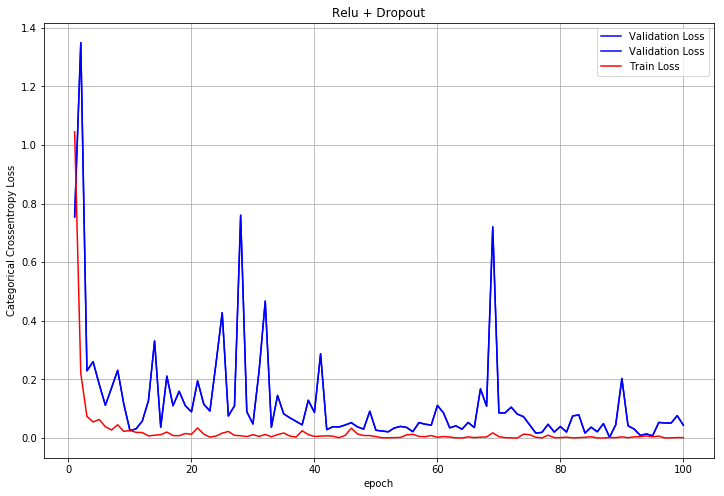

In [126]:
fig, ax = plt.subplots(1,1, figsize = (12, 8))
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
plt.title('Relu + Dropout')

# list of epoch numbers: epoch = 100
x = list(range(1,100+1))
vy = h.history['val_loss']
ty = h.history['loss']
plt_dynamic(x, vy, ty, ax)

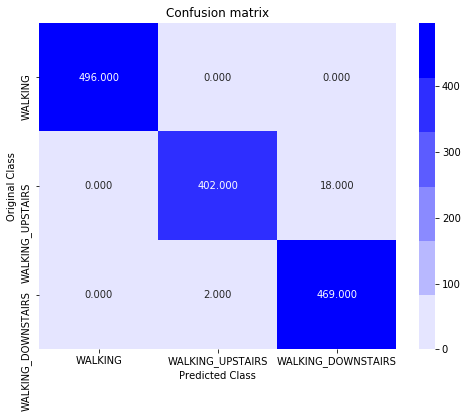

In [127]:
confusion_matrix(Y_test, m.predict(X_test))

In [128]:
m.save('model3')

# Divide + Conquer Prediction

In [129]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration

SIGNALS = ["body_acc_x",
           "body_acc_y",
           "body_acc_z",
           "body_gyro_x",
           "body_gyro_y",
           "body_gyro_z",
           "total_acc_x",
           "total_acc_y",
           "total_acc_z"]

# Labelling the classes in y.
label = {0:'WALKING', 1:'WALKING_UPSTAIRS', 2:'WALKING_DOWNSTAIRS', 3:'SITTING', 4:'STANDING', 5:'LAYING'}

In [146]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []
    filename = 'body_acc_x_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_acc_y_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_acc_z_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_gyro_x_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_gyro_y_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'body_gyro_z_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'total_acc_x_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'total_acc_y_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
    filename = 'total_acc_z_{}.txt'.format(subset)
    signals_data.append(_read_csv(filename).as_matrix())
        

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))


def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = 'y_{}.txt'.format(subset)
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error

def plt_dynamic(x, vy, ty, ax, color = 'b'):
    ax.plot(x, vy, 'b', label = 'Validation Loss')
    ax.plot(x, vy, 'b', label = 'Validation Loss')
    ax.plot(x, ty, 'r', label = 'Train Loss')
    plt.grid()
    plt.legend()
    fig.canvas.draw()

In [135]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

print('X_train shape is: ',X_train.shape)
print('Y_train shape is: ',Y_train.shape)
print('X_test shape is: ',X_test.shape)
print('Y_test shape is: ',Y_test.shape)

X_train shape is:  (7352, 128, 9)
Y_train shape is:  (7352, 6)
X_test shape is:  (2947, 128, 9)
Y_test shape is:  (2947, 6)


In [136]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [137]:
# Configuring a session
session_conf = tf.ConfigProto(intra_op_parallelism_threads= 1,
                              inter_op_parallelism_threads= 1)

In [138]:
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [139]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [140]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [143]:
from keras.models import load_model

model1 = load_model('model1')
model2 = load_model('model2')
model3 = load_model('model3')

In [147]:
# https://github.com/UdiBhaskar/Human-Activity-Recognition--Using-Deep-NN
#predicting output activity

def predict(X):
    ##predicting whether dynamic or static
    predict_binary = model1.predict(X)
    f_predict_binary = np.argmax(predict_binary, axis=1)
    
    #static data filter
    X_static = X[f_predict_binary==1]
    
    #dynamic data filter
    X_dynamic = X[f_predict_binary==0]
    
    #predicting static activities
    predict_static = model2.predict(X_static)
    f_predict_static = np.argmax(predict_static,axis=1)
    
    #adding 3 because need to get inital prediction lable as output
    f_predict_static = f_predict_static + 3
    
    #predicting dynamic activites
    predict_dynamic = model3.predict(X_dynamic)
    f_predict_dynamic = np.argmax(predict_dynamic,axis=1)
    
    #adding 1 because need to get inal prediction lable as output
    f_predict_dynamic = f_predict_dynamic
    
    ##appending final output to one list in the same sequence of input data
    i,j = 0,0
    final_predict = []
    
    for q_p in f_predict_binary:
        if q_p == 1:
            final_predict.append(f_predict_static[i])
            i = i + 1
        else:
            final_predict.append(f_predict_dynamic[j])
            j = j + 1
    
    return final_predict



In [149]:
from sklearn.metrics import accuracy_score

train_pred = predict(X_train)
test_pred = predict(X_test)

print('Accuracy of train data',accuracy_score(np.argmax(Y_train,axis=1),train_pred))
print('Accuracy of validation data',accuracy_score(np.argmax(Y_test,axis=1),test_pred))

Accuracy of train data 0.9895266594124048
Accuracy of validation data 0.9528333898880217


Text(0.5, 1.0, 'Confusion matrix')

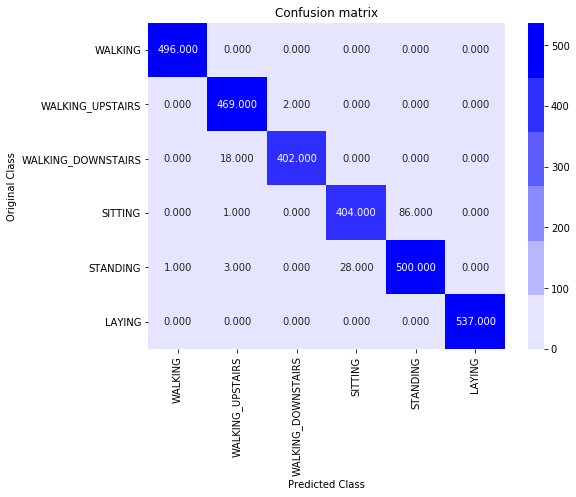

In [183]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(Y_test,axis=1), test_pred)
plt.figure(figsize= (8, 6))
sns.heatmap(cm, annot=True, cmap= sns.light_palette("blue"), fmt=".3f", xticklabels=label.values(), 
                      yticklabels= label.values())
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.title("Confusion matrix")

# Conclusions

### Due to low computation power (Colab not supported on windows vista), hyperparameter tuning via GridSearchCV was not possible, hence tried different architectures. 

In [186]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ['Rank', 'Model', "Test Accuracy"]

x.add_row([1, "Model-3 Dynamic", "98.60%"])
x.add_row([2, "Model-2 Static", "93.20%"])
x.add_row([3, "Divide + Conquer Model", "95.30%"])
x.add_row([4, "32 LSTM Base Model", "90.20%"])

print(x)

+------+------------------------+---------------+
| Rank |         Model          | Test Accuracy |
+------+------------------------+---------------+
|  1   |    Model-3 Dynamic     |     98.60%    |
|  2   |     Model-2 Static     |     93.20%    |
|  3   | Divide + Conquer Model |     95.30%    |
|  4   |   32 LSTM Base Model   |     90.20%    |
+------+------------------------+---------------+
